Aim of this project is to predict 1. Primary fuel  2. Capacity_mw

In [1]:
import numpy as np
import pandas as pd

In [75]:
df = pd.read_csv("database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
df.shape

(907, 27)

In [77]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

Removing maximum number of null values from the dataset to get the accurate results.

In [79]:
df.drop(['estimated_generation_gwh','wepp_id','other_fuel3','other_fuel1','other_fuel2'],axis=1,inplace=True)

In [80]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,...,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,NaN,...,WRI,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,NaN,...,WRI,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,NaN,...,WRI,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       907
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_gwh_2019       907
generation_data_source    458
dtype: int64

Removing unwanted columns. These coulmns were removed by checking the importantance of each column in global power plant. Less impacted columns were removed.

In [82]:
df.drop(['gppd_idnr','owner','generation_data_source','year_of_capacity_data','name','url','country','country_long'],axis=1,inplace=True)

In [83]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,WRI,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN
903,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
# filling geolocation_source with mode because category data
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)

In [85]:
# filling null values with median in numerical columns
df.fillna(df.median()[0], inplace=True)

C:\Users\tadis\AppData\Local\Temp\ipykernel_5188\3477633083.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median()[0], inplace=True)


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   commissioning_year   907 non-null    float64
 5   source               907 non-null    object 
 6   geolocation_source   907 non-null    object 
 7   generation_gwh_2013  907 non-null    float64
 8   generation_gwh_2014  907 non-null    float64
 9   generation_gwh_2015  907 non-null    float64
 10  generation_gwh_2016  907 non-null    float64
 11  generation_gwh_2017  907 non-null    float64
 12  generation_gwh_2018  907 non-null    float64
 13  generation_gwh_2019  907 non-null    float64
dtypes: float64(11), object(3)
memory usage: 99.3+ KB


In [87]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

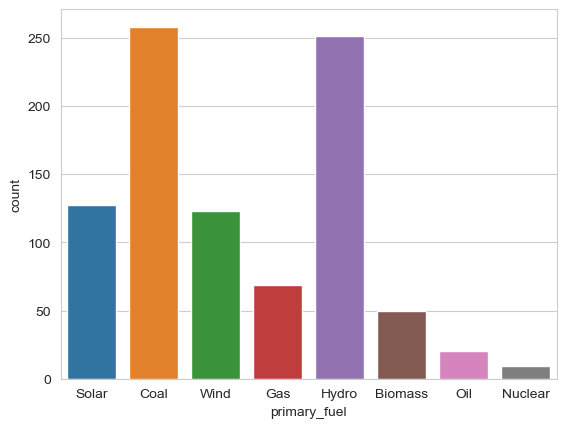

In [88]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")
sns.countplot(x="primary_fuel", data=df)

# EDA

In [89]:
dfcorr=df.corr()

In [90]:
df.drop(['generation_gwh_2013','generation_gwh_2019'],axis = 1, inplace = True)

<AxesSubplot:>

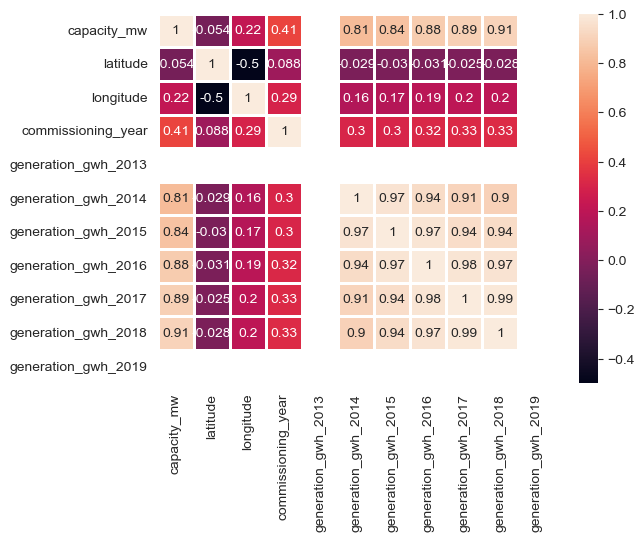

In [91]:
sns.heatmap(dfcorr,annot=True, linewidth=1)

By observations we can notice that the generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017,generation_gwh_2018 are positively correlated to capacity_mw and latitude is negative correlated

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2014'>

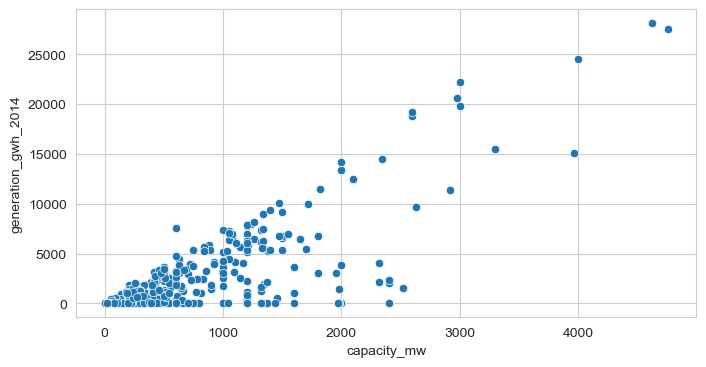

In [94]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2014',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2015'>

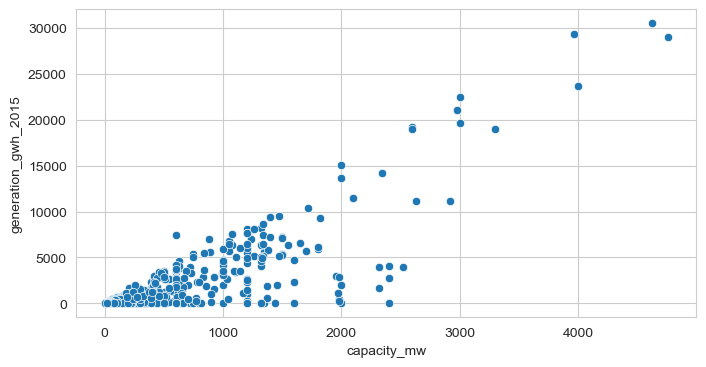

In [95]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2015',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2016'>

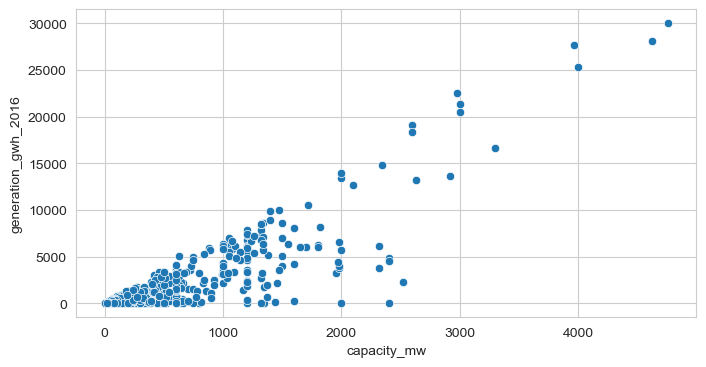

In [96]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2016',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2017'>

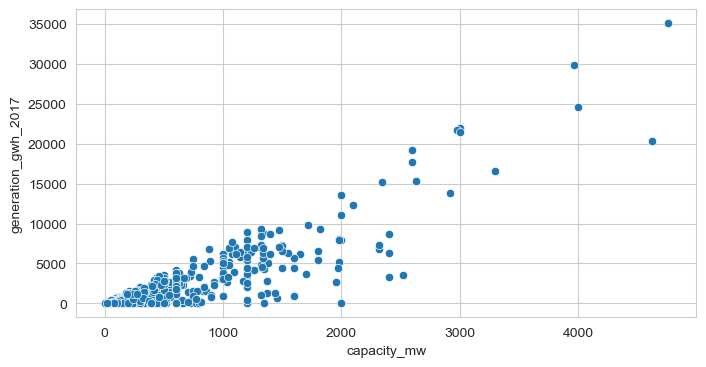

In [97]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2017',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2018'>

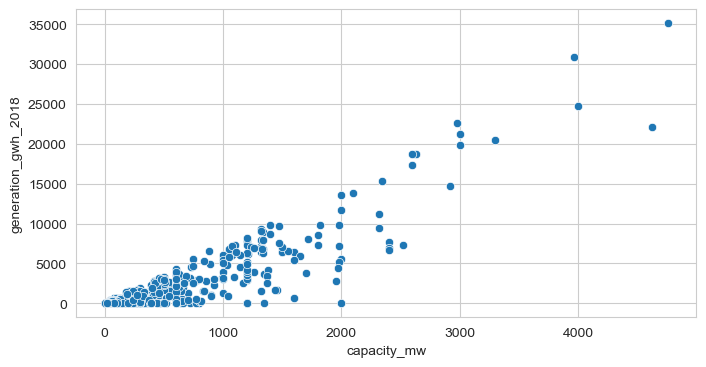

In [98]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2018',data=df)

In all the above graphs we can observe the electricity generation in gigawatt-hour increasing also increases the no of electrical generating capacity in megawatts 

<AxesSubplot:xlabel='capacity_mw', ylabel='latitude'>

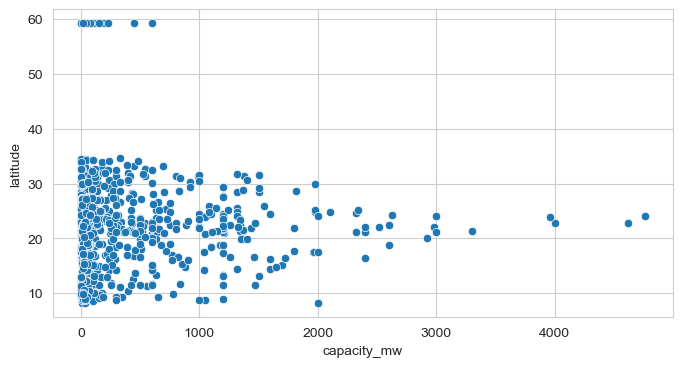

In [99]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='latitude',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

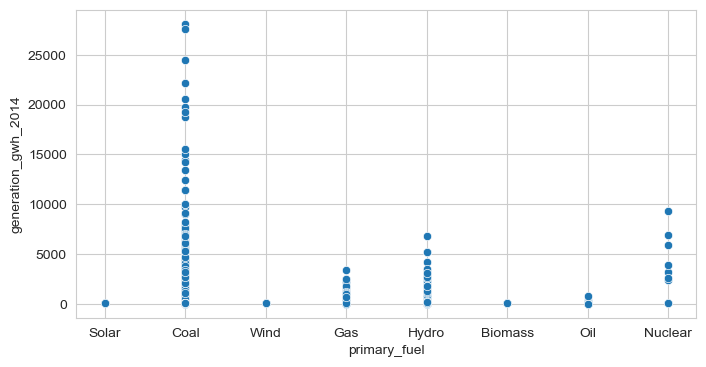

In [100]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2014',data=df)

In 2014 coal is mostly used fuel. Gas, Hydro, Nuclear are averagely used.solar, wind, biomass and oil are very less used.

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

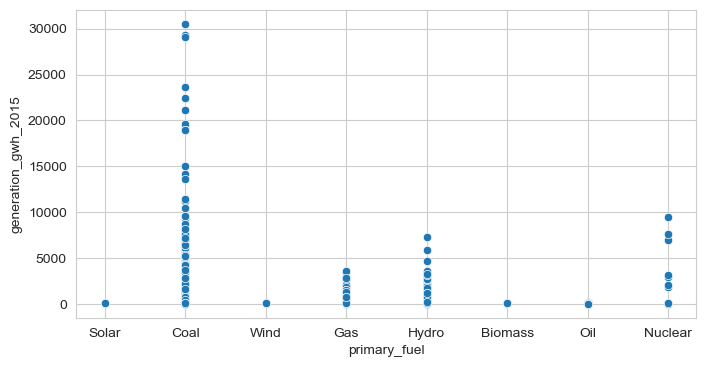

In [101]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2015',data=df)

In 2015 coal is mostly used fuel. Gas, Hydro, Nuclear are averagely used.solar, wind, biomass and oil are very less used.

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

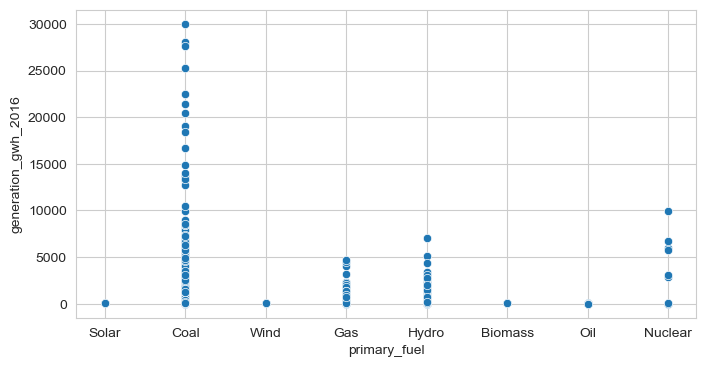

In [102]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2016',data=df)

In 2016 coal is mostly used fuel. Gas, Hydro, Nuclear are averagely used.solar, wind, biomass and oil are very less used.

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

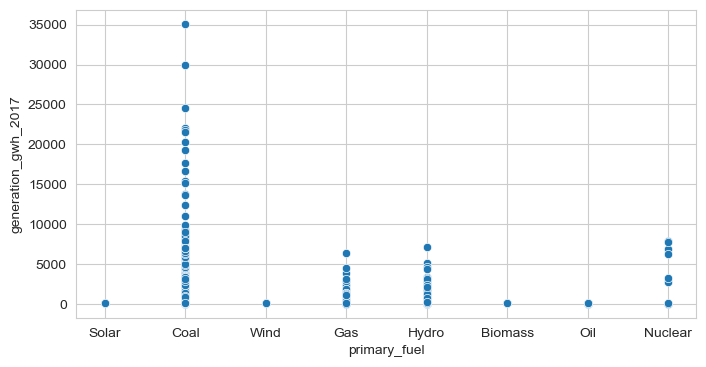

In [104]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2017',data=df)

In 2017 coal is mostly used fuel. Gas, Hydro, Nuclear are averagely used.solar, wind, biomass and oil are very less used.

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2018'>

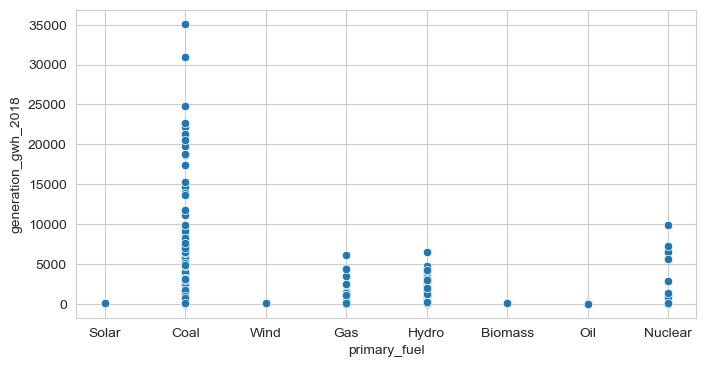

In [105]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2018',data=df)

In 2018 coal is mostly used fuel. Gas, Hydro, Nuclear are averagely used.solar, wind, biomass and oil are very less used.

<AxesSubplot:xlabel='primary_fuel', ylabel='latitude'>

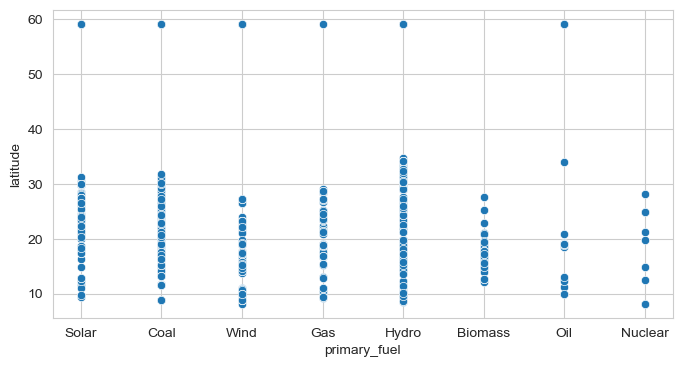

In [106]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='latitude',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='primary_fuel'>

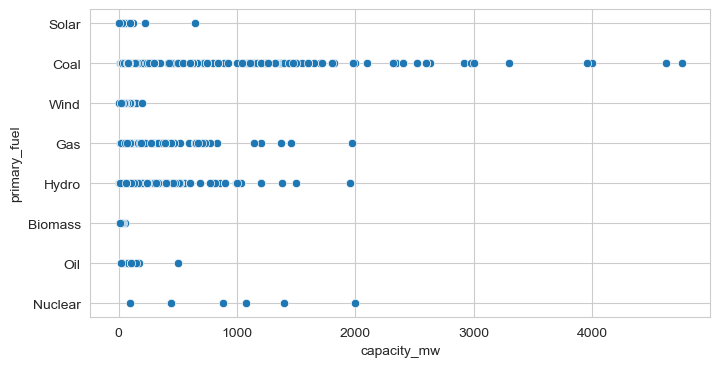

In [107]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='primary_fuel',data=df)

# Label Encoding

In [109]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
encoder = LabelEncoder()
df['primary_fuel'] = encoder.fit_transform(df['primary_fuel'])
df['geolocation_source'] = encoder.fit_transform(df['geolocation_source'])
df['source'] = encoder.fit_transform(df['source'])

In [110]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.0,109,1,59.200000,59.200000,59.200000,59.200000,59.200000
1,98.0,24.7663,74.6090,1,59.2,174,2,59.200000,59.200000,59.200000,59.200000,59.200000
2,39.2,21.9038,69.3732,7,59.2,21,2,59.200000,59.200000,59.200000,59.200000,59.200000
3,135.0,23.8712,91.3602,2,2004.0,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.0,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2016.0,22,2,59.200000,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,59.2,77,0,59.200000,59.200000,59.200000,59.200000,59.200000
904,25.5,15.2758,75.5811,7,59.2,21,2,59.200000,59.200000,59.200000,59.200000,59.200000
905,80.0,24.3500,73.7477,1,59.2,59,2,59.200000,59.200000,59.200000,59.200000,59.200000


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    int32  
 4   commissioning_year   907 non-null    float64
 5   source               907 non-null    int32  
 6   geolocation_source   907 non-null    int32  
 7   generation_gwh_2014  907 non-null    float64
 8   generation_gwh_2015  907 non-null    float64
 9   generation_gwh_2016  907 non-null    float64
 10  generation_gwh_2017  907 non-null    float64
 11  generation_gwh_2018  907 non-null    float64
dtypes: float64(9), int32(3)
memory usage: 74.5 KB


# Outlier Removal

In [113]:
from scipy.stats import zscore
z=np.abs(zscore(df[['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','capacity_mw']]))
print(np.where(z>3))

(array([ 15,  15,  15,  15,  15, 143, 143, 143, 143, 143, 143, 147, 158,
       209, 209, 209, 209, 209, 209, 308, 308, 308, 308, 308, 308, 363,
       364, 364, 364, 364, 364, 364, 375, 482, 482, 493, 493, 493, 493,
       493, 493, 494, 494, 494, 494, 494, 494, 532, 623, 648, 648, 648,
       648, 648, 648, 657, 657, 657, 657, 657, 657, 695, 695, 695, 695,
       695, 695, 721, 721, 721, 721, 721, 724, 724, 724, 724, 724, 726,
       726, 726, 726, 726, 726, 767, 786, 786, 786, 786, 786, 786, 788,
       808, 808, 808, 808, 808, 808, 880, 880, 880, 880, 880, 880],
      dtype=int64), array([1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 5, 0, 0, 1, 2, 3, 4, 5, 0, 1, 2,
       3, 4, 5, 5, 0, 1, 2, 3, 4, 5, 5, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2,
       3, 4, 5, 0, 0, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4,
       5, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5, 5, 0, 1, 2, 3,
       4, 5, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5], dtype=int64))


In [115]:
z = np.abs(zscore(df[['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','capacity_mw']]))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

Shape of the dataframe before removing outliers:  (907, 12)
Shape of the dataframe after removing outliers:  (882, 12)
Percentage of data loss post outlier removal:  2.7563395810363835


In [116]:
df=df1.copy()

In [117]:
df.shape

(882, 12)

C:\Users\tadis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tadis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tadis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

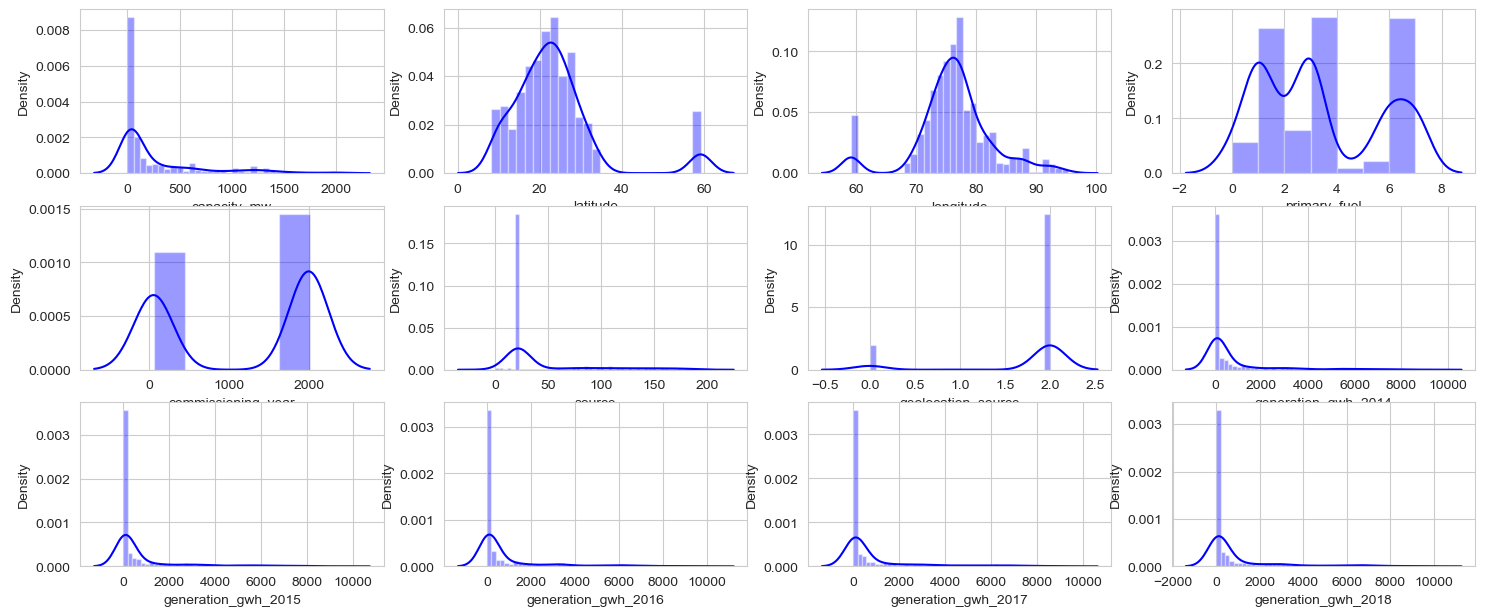

In [118]:
plt.figure(figsize=(18,20))
for i in enumerate(df):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='b')

In [119]:
df.skew()

capacity_mw            2.054665
latitude               1.914796
longitude             -0.275375
primary_fuel           0.428186
commissioning_year    -0.279248
source                 1.782583
geolocation_source    -2.112610
generation_gwh_2014    2.885639
generation_gwh_2015    2.711018
generation_gwh_2016    2.651120
generation_gwh_2017    2.563221
generation_gwh_2018    2.615528
dtype: float64

capacity_mw, latitude, source,geolocation_source,generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018 are having skewness

In [121]:
from sklearn.preprocessing import power_transform
df[['capacity_mw',"generation_gwh_2014",'generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]=power_transform(df[['capacity_mw',"generation_gwh_2014",'generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']])
df.skew()

capacity_mw            0.016603
latitude               1.914796
longitude             -0.275375
primary_fuel           0.428186
commissioning_year    -0.279248
source                 1.782583
geolocation_source    -2.112610
generation_gwh_2014   -0.016889
generation_gwh_2015   -0.015204
generation_gwh_2016   -0.011726
generation_gwh_2017   -0.006580
generation_gwh_2018   -0.001061
dtype: float64

In [122]:
x=df.drop(['capacity_mw'],axis=1)
y=df['capacity_mw']

In [123]:
x.shape

(882, 11)

In [124]:
y.shape

(882,)

In [126]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(x)
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [127]:
pd.DataFrame(x).describe().T

,count,mean,std,min,25%,50%,75%,max
0,882.0,0.293848,0.204767,0.0,0.172280,0.274085,0.365181,1.0
1,882.0,0.475981,0.173376,0.0,0.401798,0.475058,0.549905,1.0
2,882.0,0.466958,0.325982,0.0,0.142857,0.428571,0.857143,1.0
3,882.0,0.562984,0.490143,0.0,0.000000,0.978048,0.991832,1.0
4,882.0,0.234037,0.237462,0.0,0.115789,0.115789,0.188158,1.0
5,882.0,0.862812,0.342589,0.0,1.000000,1.000000,1.000000,1.0
6,882.0,0.568775,0.196297,0.0,0.479779,0.479779,0.696765,1.0
7,882.0,0.571681,0.198850,0.0,0.480732,0.480732,0.705298,1.0
8,882.0,0.569223,0.201550,0.0,0.473836,0.473836,0.696480,1.0
9,882.0,0.567041,0.209030,0.0,0.467732,0.467732,0.706463,1.0


In [133]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.27,random_state=95)

In [135]:
x_train.shape

(643, 11)

In [136]:
x_test.shape

(239, 11)

In [137]:
y_train

750   -0.978424
690    0.357243
120   -0.299112
195   -0.438532
823   -1.040403
         ...   
796    1.130488
119   -0.785394
544    1.573971
302   -0.411785
415   -0.504982
Name: capacity_mw, Length: 643, dtype: float64

In [138]:
y_test

73    -1.004550
356   -0.701123
669   -0.122415
637    1.018273
824   -0.807639
         ...   
836   -1.895109
541   -1.004550
54    -0.022010
307    0.478265
459    0.534659
Name: capacity_mw, Length: 239, dtype: float64

In [143]:
from sklearn.svm import SVR
svr=SVR(kernel='poly')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)

0.7932150109295575


In [144]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
print('MSE:',mean_squared_error(svr_predict,y_test))
print('MAE:',mean_absolute_error(svr_predict,y_test))
print('r2_score:',r2_score(svr_predict,y_test))

MSE: 0.23418834950275624
MAE: 0.3526721303082932
r2_score: 0.670442784867259


In [146]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)

0.9624648961054156


In [147]:
print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))

MSE: 0.16628080834598014
MAE: 0.2930202800725712
r2_score: 0.7895690445299296


In [148]:
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

0.9931630653357881


In [149]:
print('MSE:',mean_squared_error(DTR_PRED,y_test))
print('MAE:',mean_absolute_error(DTR_PRED,y_test))
print('r2_score:',r2_score(DTR_PRED,y_test))

MSE: 0.3138827792788564
MAE: 0.39234784236162656
r2_score: 0.6859379417798602


In [150]:
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.8874014663702411


In [151]:
print('MSE:',mean_squared_error(GBR_PRED,y_test))
print('MAE:',mean_absolute_error(GBR_PRED,y_test))
print('r2_score:',r2_score(GBR_PRED,y_test))

MSE: 0.17584242784811302
MAE: 0.3074673718485531
r2_score: 0.7667306049484091


In [153]:
from sklearn.linear_model import Ridge
R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.6043138130235981


In [154]:
print('MSE:',mean_squared_error(R_predict,y_test))
print('MAE:',mean_absolute_error(R_predict,y_test))
print('r2_score:',r2_score(R_predict,y_test))

MSE: 0.4266397909200016
MAE: 0.5202184223847859
r2_score: 0.24997793609450747


In [156]:
from sklearn.model_selection import cross_val_score
np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [Ridge(),  
          SVR(kernel='poly'),
          RandomForestRegressor(),
          DecisionTreeRegressor(),  
          GradientBoostingRegressor(),]
            


names = ['r','svr','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

r    : 0.410215, 0.067299
svr    : 0.249571, 0.046078
RF    : 0.210424, 0.061385
DTR    : 0.328943, 0.084965
GBR    : 0.204712, 0.059120


# Hyperparameter Tuning

In [157]:
GF=GradientBoostingRegressor()
param={
     'criterion':['mse','mae'],
     'n_estimators':[100, 200],
    }

In [160]:
from sklearn.model_selection import GridSearchCV
GF_grid=GridSearchCV(RandomForestRegressor(),param,cv=10,scoring='accuracy',n_jobs=-1,verbose=2)

In [161]:
GF_grid.fit(x_train,y_train)
GF_grid_pred=GF_grid.best_estimator_.predict(x_test)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


C:\Users\tadis\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(
C:\Users\tadis\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


In [162]:
GF_grid.best_params_

{'criterion': 'mse', 'n_estimators': 100}

In [163]:
print('MSE:',mean_squared_error(GF_grid_pred,y_test))
print('MAE:',mean_absolute_error(GF_grid_pred,y_test))
print('r2_score:',r2_score(GF_grid_pred,y_test))

MSE: 0.17240608453746853
MAE: 0.2953978502745431
r2_score: 0.7828291840402307


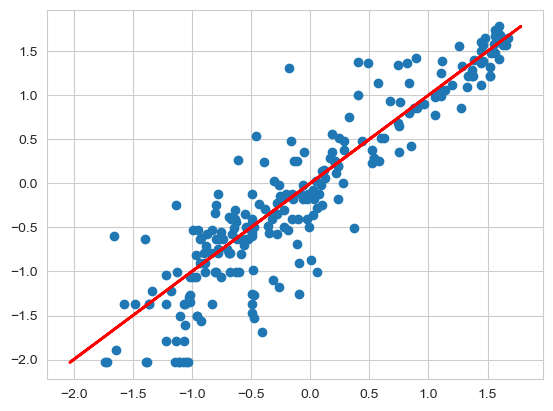

In [164]:
plt.scatter(GF_grid_pred,y_test)
plt.plot(y_test,y_test,linewidth=2,color='Red')

# To predict primary_fuel as target

In [166]:
x=df.drop(['primary_fuel'],axis=1)
y=df['primary_fuel']

In [167]:
x.shape

(882, 11)

In [168]:
y.shape

(882,)

In [169]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.27,random_state=42)

In [ ]:

import io
import requests

import pickle
import os
import joblib
import plotly.express as px

from pandas.api.types import CategoricalDtype
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score




from sklearn.pipeline import FeatureUnion



%matplotlib inline

In [171]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x,y,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))

cross validation score for svm: 0.802715716486903


In [176]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.7656903765690377
[[ 8  2  0  0  0  0  0  0]
 [ 4 49  8  7  5  2  0  0]
 [ 0  7  3  5  1  2  0  0]
 [ 0  4  3 58  1  1  0  0]
 [ 0  1  2  0  0  0  0  0]
 [ 0  0  1  0  0  3  0  0]
 [ 0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0 29]]
              precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.78      0.65      0.71        75
           2       0.18      0.17      0.17        18
           3       0.83      0.87      0.85        67
           4       0.00      0.00      0.00         3
           5       0.38      0.75      0.50         4
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        29

    accuracy                           0.77       239
   macro avg       0.60      0.65      0.62       239
weighted avg       0.78      0.77      0.77       239

Training accuracy:: 1.0
Test accuracy:: 0.7656903765690377


In [180]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x,y,cv=5,scoring='accuracy')

C:\Users\tadis\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\tadis\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [178]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.6610878661087866
[[ 4  4  0  0  0  0  1  1]
 [ 7 43  5 13  0  0  4  3]
 [ 1  6  5  5  0  0  0  1]
 [ 0  7  2 56  0  2  0  0]
 [ 0  1  1  1  0  0  0  0]
 [ 0  1  0  2  0  0  1  0]
 [ 3  8  0  0  0  0 21  1]
 [ 0  0  0  0  0  0  0 29]]
              precision    recall  f1-score   support

           0       0.27      0.40      0.32        10
           1       0.61      0.57      0.59        75
           2       0.38      0.28      0.32        18
           3       0.73      0.84      0.78        67
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       0.78      0.64      0.70        33
           7       0.83      1.00      0.91        29

    accuracy                           0.66       239
   macro avg       0.45      0.47      0.45       239
weighted avg       0.64      0.66      0.65       239

Training accuracy:: 0.8195956454121306
Test accuracy:: 0.6610878661087866


C:\Users\tadis\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\tadis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tadis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-d

In [182]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x,y,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.8503531073446327


In [183]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.8577405857740585
[[ 7  2  0  0  0  0  0  1]
 [ 2 65  1  5  0  1  0  1]
 [ 0  6  7  3  0  1  0  1]
 [ 0  6  0 61  0  0  0  0]
 [ 0  2  1  0  0  0  0  0]
 [ 0  1  0  0  0  3  0  0]
 [ 0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0 29]]
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.79      0.87      0.83        75
           2       0.78      0.39      0.52        18
           3       0.88      0.91      0.90        67
           4       0.00      0.00      0.00         3
           5       0.60      0.75      0.67         4
           6       1.00      1.00      1.00        33
           7       0.91      1.00      0.95        29

    accuracy                           0.86       239
   macro avg       0.72      0.70      0.70       239
weighted avg       0.85      0.86      0.85       239

Training accuracy:: 1.0
Test accuracy:: 0.8577405857740585


C:\Users\tadis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tadis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tadis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [185]:
from sklearn.ensemble import GradientBoostingClassifier
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x,y,cv=10,scoring='accuracy')
print("cross validation score for Gradient Boosting Classifier:",np.mean(grbc_score))

C:\Users\tadis\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


cross validation score for Gradient Boosting Classifier: 0.8605975485188969


In [187]:

grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))

0.8577405857740585
[[ 7  3  0  0  0  0  0  0]
 [ 5 61  1  6  1  1  0  0]
 [ 0  6 10  2  0  0  0  0]
 [ 0  5  1 61  0  0  0  0]
 [ 0  1  0  1  1  0  0  0]
 [ 0  1  0  0  0  3  0  0]
 [ 0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0 29]]
              precision    recall  f1-score   support

           0       0.58      0.70      0.64        10
           1       0.79      0.81      0.80        75
           2       0.83      0.56      0.67        18
           3       0.87      0.91      0.89        67
           4       0.50      0.33      0.40         3
           5       0.75      0.75      0.75         4
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        29

    accuracy                           0.86       239
   macro avg       0.79      0.76      0.77       239
weighted avg       0.86      0.86      0.86       239

Training accuracy:: 1.0
Test accuracy:: 0.8577405857740585


In [188]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,x,y,cv=10,scoring='accuracy')
print("cross validation score for BAGGING Classifier:",np.mean(bgc_score))

C:\Users\tadis\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


cross validation score for BAGGING Classifier: 0.8299540347293155


In [189]:
bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print(accuracy_score(y_test,predicted_bgc))
print(confusion_matrix(y_test,predicted_bgc))
print(classification_report(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))

0.8158995815899581
[[ 8  2  0  0  0  0  0  0]
 [ 6 53  5  7  3  1  0  0]
 [ 0  4  9  4  0  1  0  0]
 [ 0  4  2 61  0  0  0  0]
 [ 0  2  1  0  0  0  0  0]
 [ 0  1  1  0  0  2  0  0]
 [ 0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0 29]]
              precision    recall  f1-score   support

           0       0.57      0.80      0.67        10
           1       0.80      0.71      0.75        75
           2       0.50      0.50      0.50        18
           3       0.85      0.91      0.88        67
           4       0.00      0.00      0.00         3
           5       0.50      0.50      0.50         4
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        29

    accuracy                           0.82       239
   macro avg       0.65      0.68      0.66       239
weighted avg       0.82      0.82      0.82       239

Training accuracy:: 0.9922239502332815
Test accuracy:: 0.8158995815899581


In [190]:
rfc=RandomForestClassifier()
param_grid={
    'criterion' : ["gini", "entropy"],
    'n_estimators':[200,50],
    'min_samples_split':[2,3],
     'random_state':[10]              
}

In [191]:
rfc_grid=GridSearchCV(RandomForestClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [192]:
rfc_grid.fit(x_train,y_train)
rfc_pred=rfc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,rfc_pred))

Fitting 4 folds for each of 8 candidates, totalling 32 fits
Accuracy after parameter tuning:: 0.8410041841004184


In [193]:
rfc_grid.best_params_

{'criterion': 'gini',
 'min_samples_split': 2,
 'n_estimators': 200,
 'random_state': 10}

In [194]:
best_param={
    'criterion' : ['gini'],
    'n_estimators':[200],
    'min_samples_split':[2],
     'random_state':[10]    }

In [195]:
best_rfc_grid=GridSearchCV(RandomForestClassifier(),best_param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [196]:
best_rfc_grid.fit(x_train,y_train)
best_rfc_pred=best_rfc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,best_rfc_pred))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Accuracy after parameter tuning:: 0.8410041841004184


In [197]:
print("CLASSIFICATION REPORT::\n",classification_report(y_test,best_rfc_pred))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.64      0.70      0.67        10
           1       0.78      0.83      0.80        75
           2       0.55      0.33      0.41        18
           3       0.91      0.93      0.92        67
           4       0.00      0.00      0.00         3
           5       0.50      0.50      0.50         4
           6       1.00      1.00      1.00        33
           7       0.91      1.00      0.95        29

    accuracy                           0.84       239
   macro avg       0.66      0.66      0.66       239
weighted avg       0.82      0.84      0.83       239



C:\Users\tadis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tadis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tadis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\tadis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tadis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tadis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

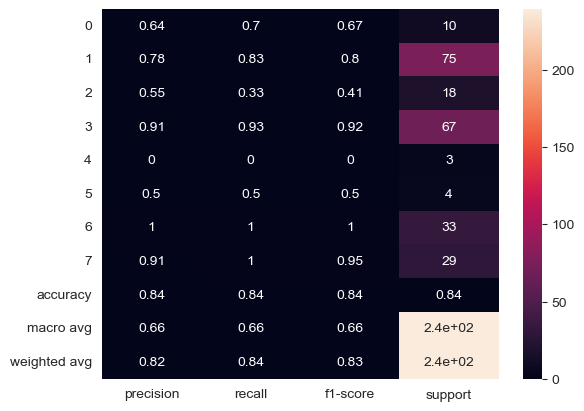

In [198]:
clsf_repo = classification_report(y_test,best_rfc_pred,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)

In [200]:
from sklearn.metrics import roc_auc_score
y_prob = best_rfc_grid.fit(x_train,y_train).predict_proba(x_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
One-vs-One ROC AUC scores:
0.930678 (macro),
0.945529 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.941933 (macro),
0.967563 (weighted by prevalence)


In [201]:
import joblib
joblib.dump(best_rfc_grid.best_estimator_,'Global Power Plant Classification.obj')

['Global Power Plant Classification.obj']